In [23]:
import pandas as pd
import math

measured_data = pd.read_csv('real_data.csv')

measured_data.head()


,real_x,real_y,measured_x,measured_y
0,213,36,204,37
1,147,37,147,37
2,93,37,93,46
3,40,40,39,45
4,40,86,33,96


In [36]:
measured_points = [tuple(r[0:2]) for r in measured_data.to_numpy()]
resec_points = [tuple(r[2:4]) for r in measured_data.to_numpy()]

def dist(point1, point2):
  return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)
  
errors = []
avg_err = 0

for i, mp in enumerate(measured_points):
  errors.append(dist(mp, resec_points[i]))
  avg_err += errors[i]

avg_err /= len(errors)
max_err = max(errors)
min_err = min(errors)

err_range = max(max_err - avg_err, avg_err - min_err)
norm_err = [ (e - avg_err)/ err_range for e in errors]

print(avg_err, max_err, min_err)
norm_err

11.701226562401516 25.0 0.0


[-0.19895379349675493,
 -0.8798726151179957,
 -0.20311847367551725,
 -0.49645232921578136,
 0.03799816995930713,
 0.3806236774835055,
 0.9310604961640006,
 -0.44141474363039296,
 -0.4749356611648222,
 1.0,
 -0.3376344467061146,
 -0.569836080924492,
 -0.667189307291304,
 0.14288866227027608,
 0.10054899079815083,
 0.2947093435196939,
 -0.09481476313643133,
 0.43334993721136433,
 0.16476838539509567,
 0.00026117809543924324,
 0.5005223391102688,
 0.7897252177468135,
 0.3442117466830701,
 -0.18660984915288362,
 -0.569836080924492]

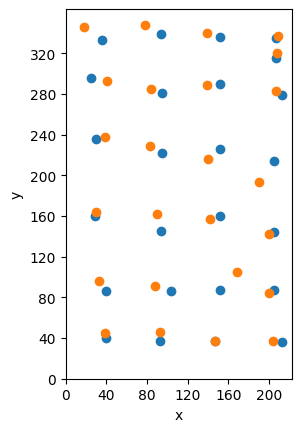

In [50]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

fig, ax = plt.subplots()
ax.scatter([r[0] for r in measured_points], [r[1] for r in measured_points])
ax.scatter([r[0] for r in resec_points], [r[1] for r in resec_points])

# draw gridlines
# ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(0, 240, 40))
ax.set_yticks(np.arange(0, 360, 40))

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_aspect(1)

plt.show()